In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_excel('DataSet.xlsx')

In [3]:
df.head()

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Unnamed: 0                                         84 non-null     datetime64[ns]
 1   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64       
 2   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64       
 3   Ключевая ставка                                    84 non-null     float64       
 4   Ставка по вкладам в долларах до 1 года             84 non-null     float64       
 5   Ставка по вкладам в рублях до 1 года               84 non-null     float64       
 6   Нефть марки Юралс, долл./барр                      84 non-null     float64       
 7   Индекс потребительских цен, ед.                    84 non-null     float64       
 8   М0, руб               

In [5]:
df.head()

,Unnamed: 0,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, руб","М2, руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
0,2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5532900.0,19307.7,30.08,20669
1,2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,5613700.0,19536.7,29.29,20680
2,2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,5647000.0,19788.7,28.43,22673
3,2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,5863400.0,20020.8,28.10,22519
4,2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5893400.0,20160.9,27.87,22779


In [6]:
# переименования столбцов для удобства
df = df.rename(columns= {
    'Unnamed: 0' : 'The_date',
    'Прирост вкладов физических лиц в рублях (млн руб)' : 'Growth_of_deposits_of_individuals',
    'Доходность ОФЗ по сроку до 1 года' : 'OFZ_yield_to_1_year',
    'Ключевая ставка' : 'Key_rate',
    'Ставка по вкладам в долларах до 1 года' : 'Rate_on_deposits_in_dollars_to_1_year',
    'Нефть марки Юралс, долл./барр' : 'Urals_oil_USD_by_bbl',
    'Индекс потребительских цен, ед.' : 'Consumer_price_index_units',
    'М0, руб' : 'M0',
    'М2, руб' : 'M2',
    'Курс доллара к рублю, руб' : 'Dollar_to_ruble_exchange_rate_rub',
    'Номинальная средняя з/п, руб' : 'Nominal_average_salary_rub',
    'Ставка по вкладам в рублях до 1 года' : 'Rate_on_deposits_in_rubles_to_1_year'
    }).set_index('The_date')

In [7]:
# описательные статистики признаков
df.iloc[:, :5].describe()

,Growth_of_deposits_of_individuals,OFZ_yield_to_1_year,Key_rate,Rate_on_deposits_in_dollars_to_1_year,Ставка по вкладам в рублях до 1 года
count,7.200000e+01,84.000000,84.000000,84.000000,84.000000
mean,1.466405e+05,7.875670,9.130952,2.184643,6.233929
std,2.593857e+05,2.195040,2.214233,1.108624,1.733394
min,-5.674480e+05,4.558571,5.500000,0.520000,4.000000
25%,1.949025e+04,6.228064,8.000000,1.510000,5.292500
50%,1.129245e+05,7.475455,8.250000,2.230000,5.755000
75%,2.360528e+05,9.332238,10.125000,2.900000,6.657500
max,1.034556e+06,15.098421,17.000000,5.220000,12.330000


In [8]:
# описательные статистики признаков
df.iloc[:, 5:].describe()

,Urals_oil_USD_by_bbl,Consumer_price_index_units,M0,M2,Dollar_to_ruble_exchange_rate_rub,Nominal_average_salary_rub
count,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000
mean,83.118095,136.725747,7.806555e+06,30105.740071,45.288690,31877.130952
std,30.069987,22.413867,9.703699e+05,6038.007629,15.539177,6029.179510
min,30.800000,106.171510,5.532900e+06,19307.700000,27.870000,20669.000000
25%,51.992500,116.118345,7.139175e+06,24456.950000,31.345000,26830.750000
50%,99.630000,131.183355,7.959500e+06,30155.450000,35.885000,32355.500000
75%,110.185000,160.386900,8.462600e+06,35124.050000,59.742500,35772.500000
max,124.930000,169.560950,9.974472e+06,42372.101217,77.220000,50500.000000


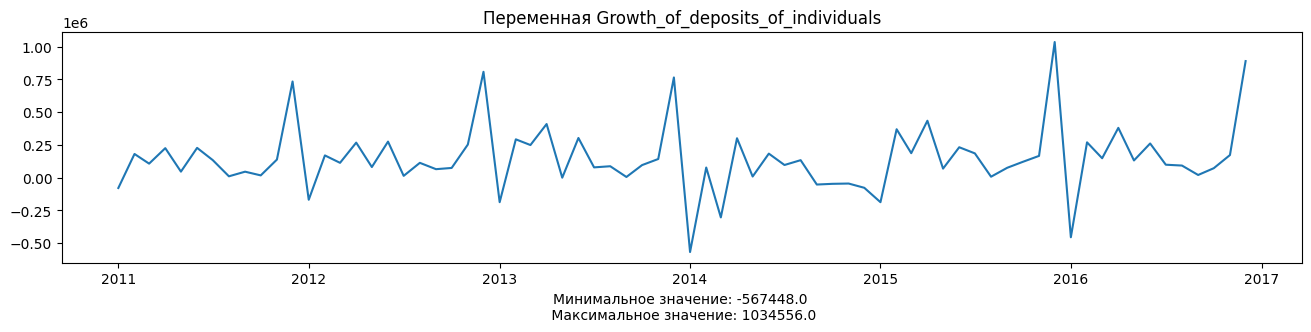

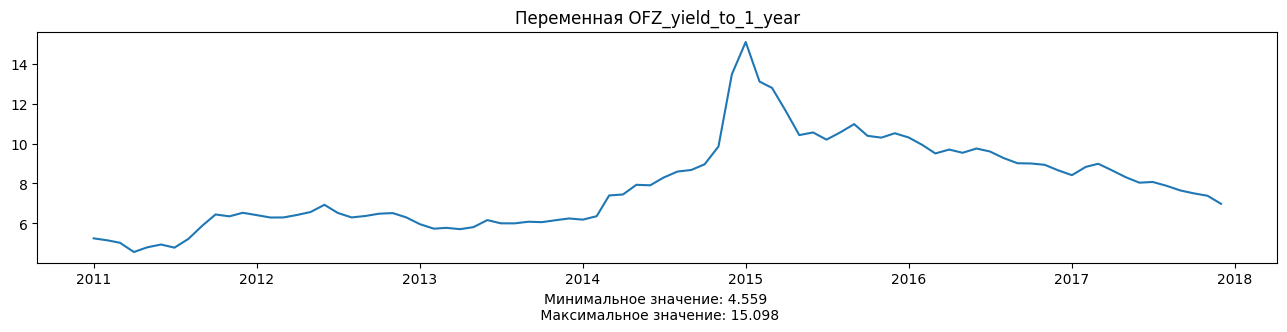

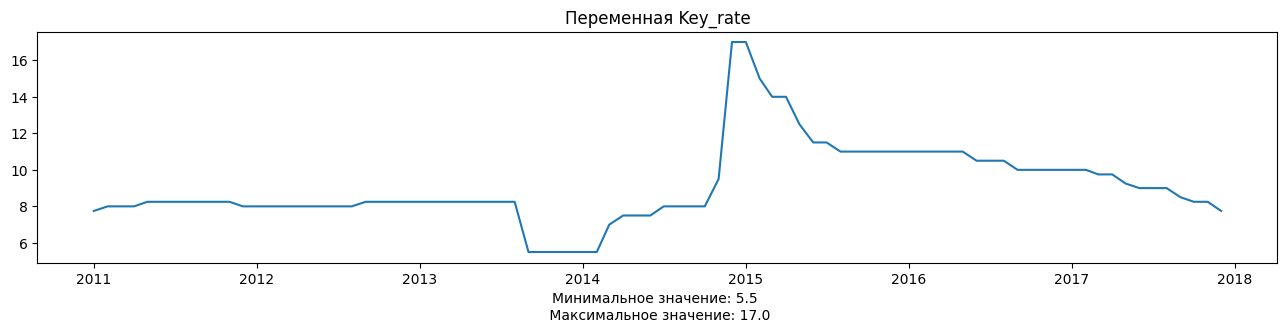

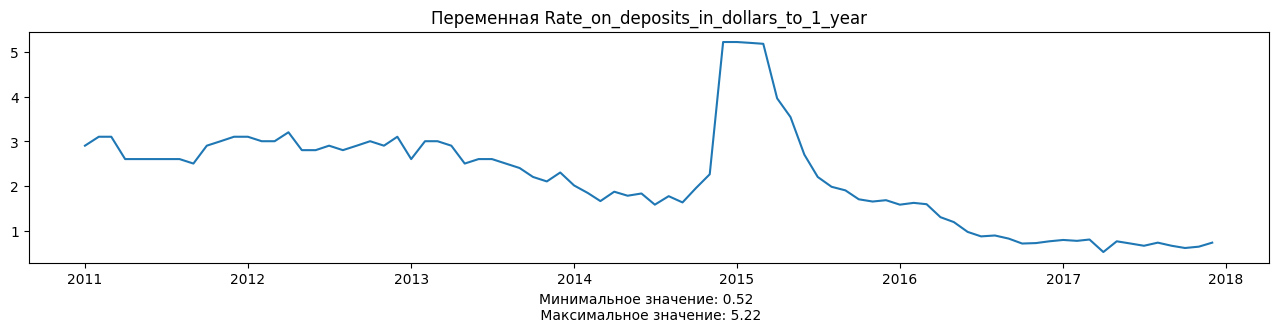

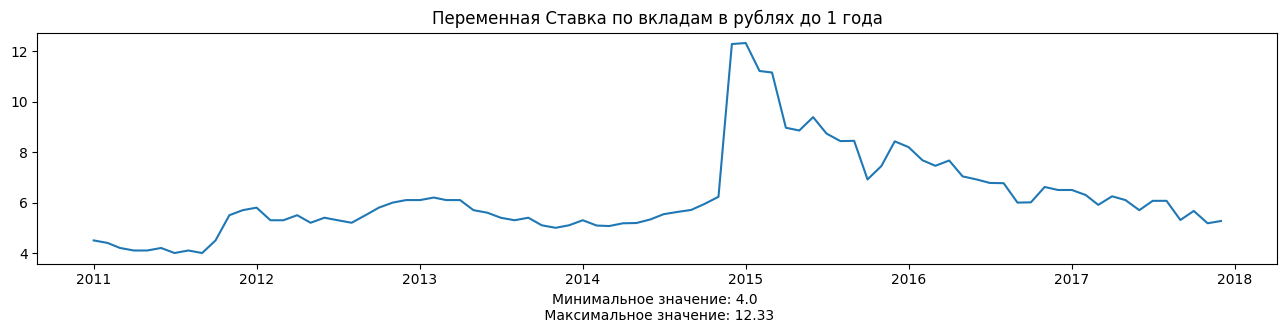

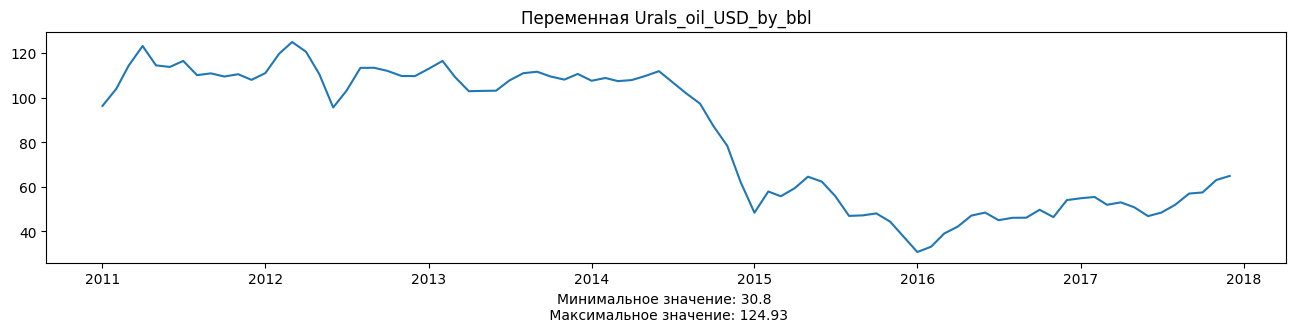

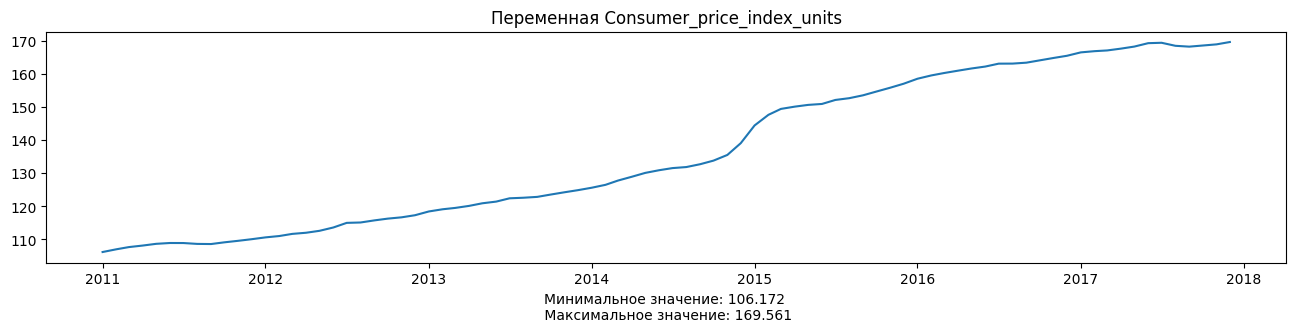

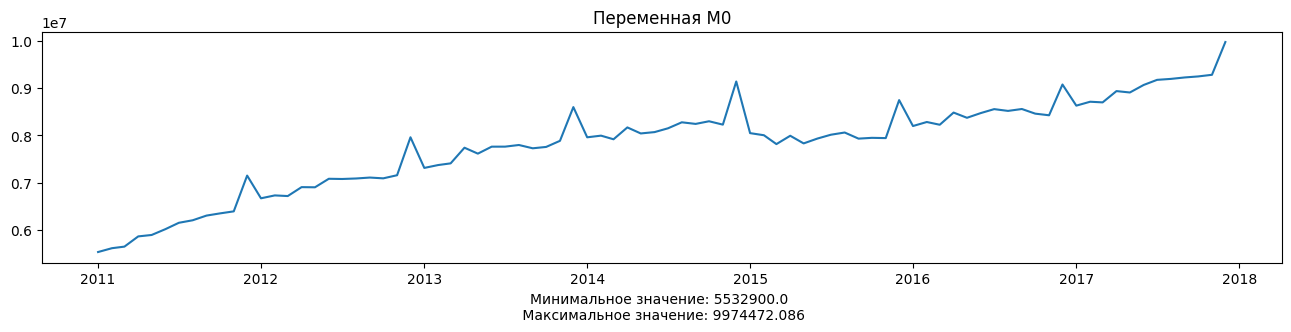

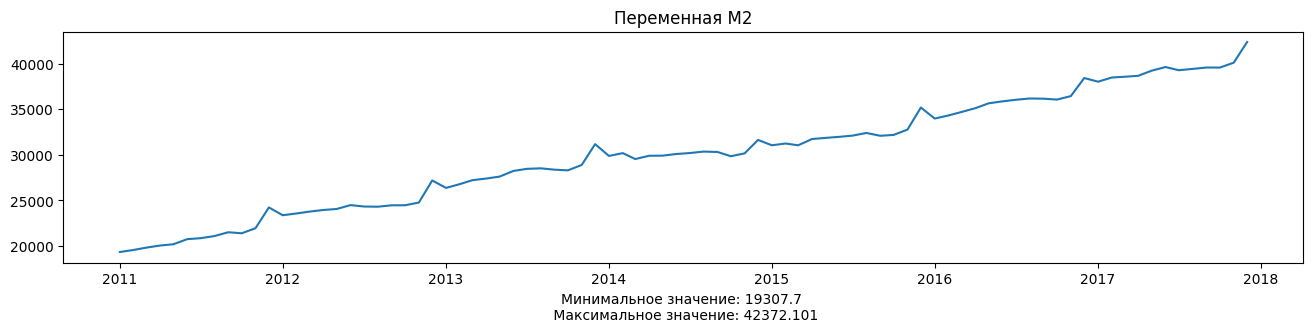

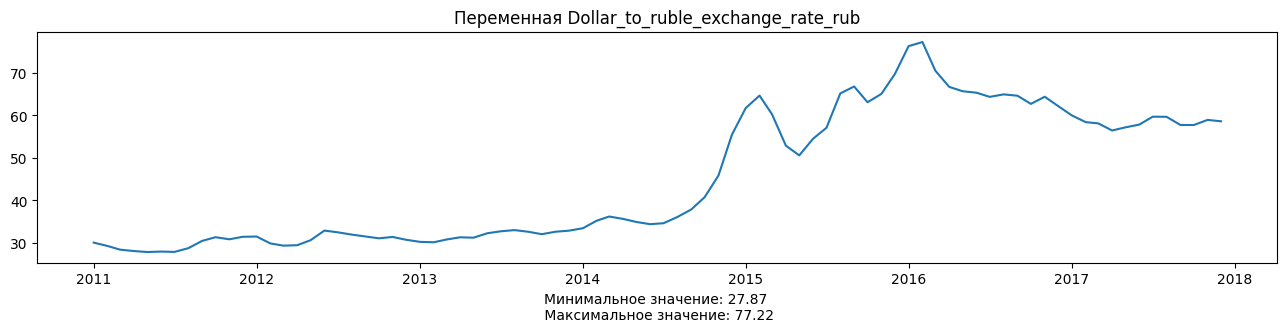

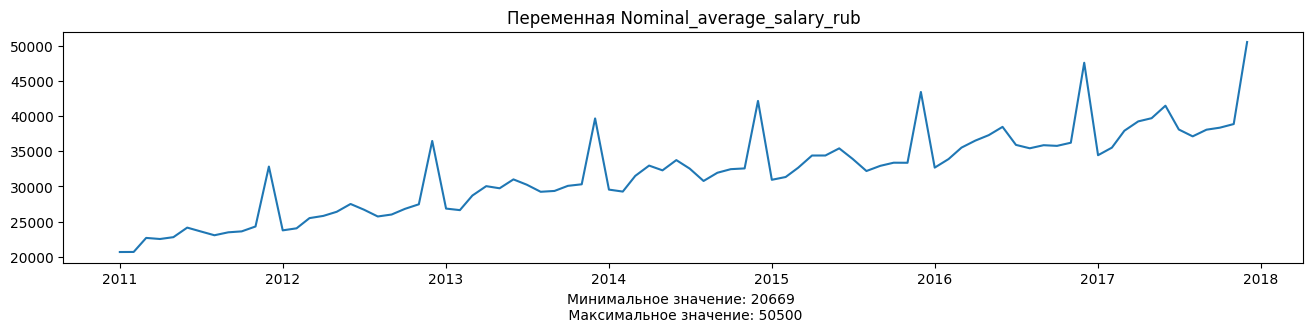

In [9]:
# изменение переменных с течением времени
for i in df.columns:
    plt.figure(figsize=(16, 3))
    plt.title(f'Переменная {i}')
    plt.plot(df[i])
    plt.xlabel('The_date')
    plt.xlabel(f'Минимальное значение: {round(df[i].min(), 3)} \n Максимальное значение: {round(df[i].max(), 3)}', fontsize= 10);

['M0', 'M2', 'Consumer_price_index_units', 'Dollar_to_ruble_exchange_rate_rub', 'Urals_oil_USD_by_bbl']


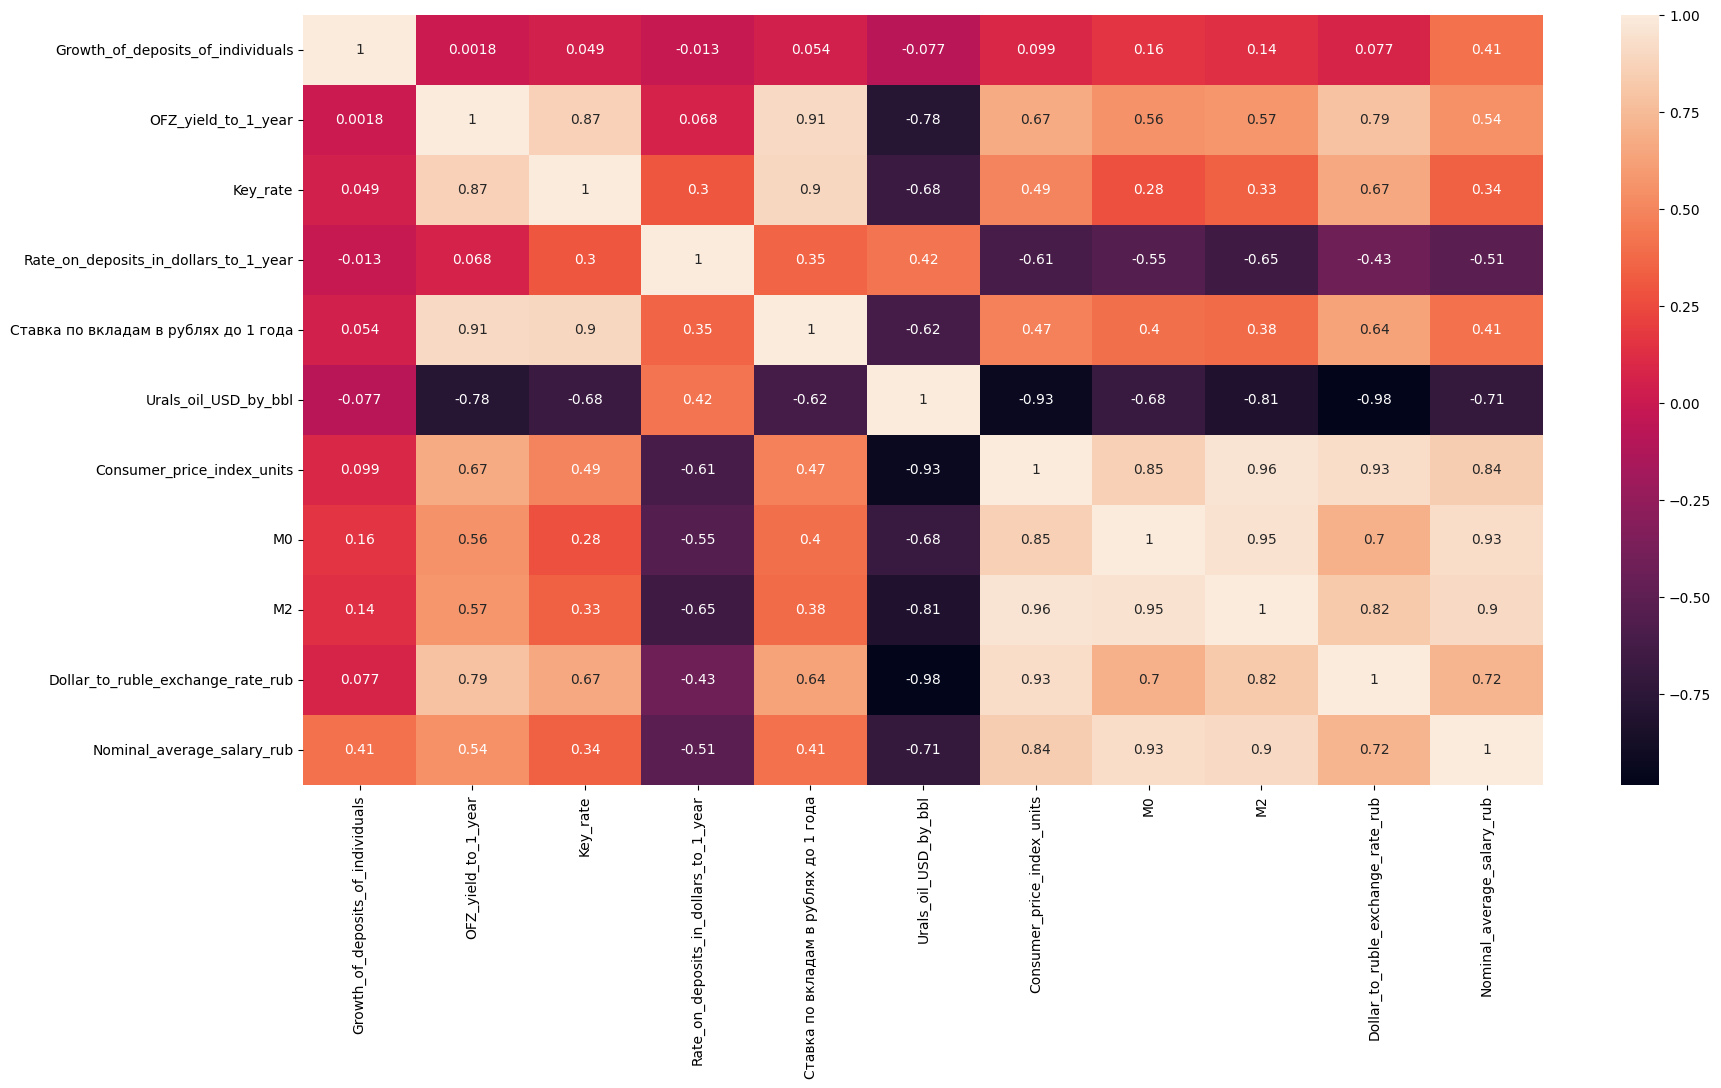

In [10]:
# корреляция признаков в df
corr_matrix_int_float = df.corr()
figure, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix_int_float, annot=True, ax=ax)

# топ 5 по корреляции с Growth_of_deposits_of_individuals
print(abs(df.corr()['Growth_of_deposits_of_individuals']).sort_values(ascending=False)[2:7].index.to_list());

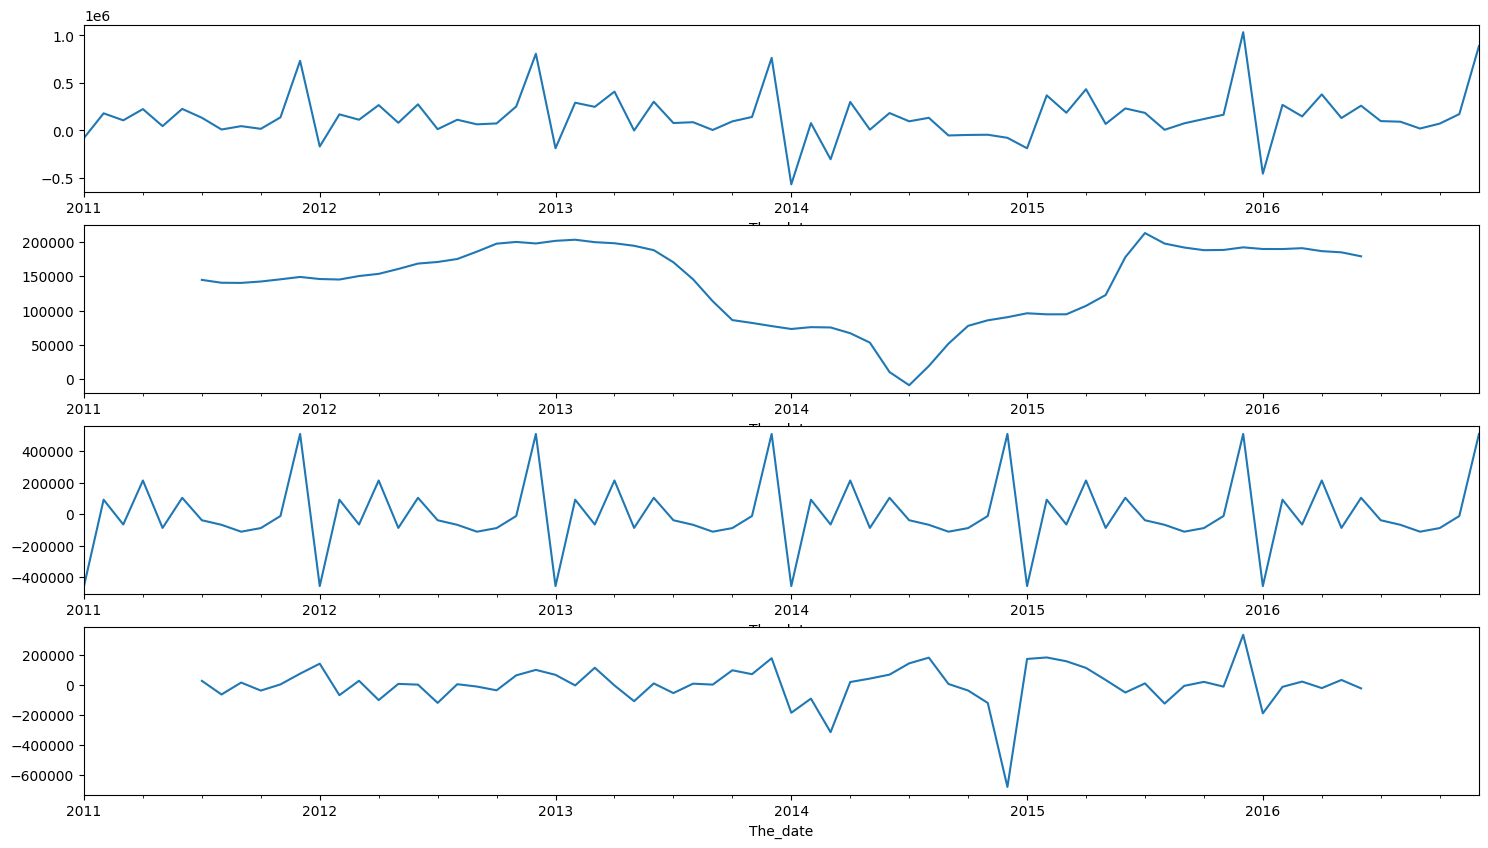

In [11]:
# разложение целевой переменной на составляющие
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(18, 10))
res = seasonal_decompose(df['Growth_of_deposits_of_individuals'][:72])

# без разложения
res.observed.plot(ax = ax1)
# тренд
res.trend.plot(ax = ax2)
# сезонность
res.seasonal.plot(ax = ax3)
# шум
res.resid.plot(ax = ax4);

### Тест Дики - Фулера

In [12]:
from statsmodels. tsa.stattools import adfuller
# H0: ряд не является стационарным
# H1: ряд стационарен 
adfuller(df['Growth_of_deposits_of_individuals'][:72])

(-1.5624513827398323,
 0.5024228765613992,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1634.4005057329534)

P-value: 0.5024228765613992 -> отвергаю H1

In [13]:
# смещение и логорифмирование для нормирования целевой переменной
df['Growth_of_deposits_of_individuals_log'] = np.log(df['Growth_of_deposits_of_individuals'] - (df['Growth_of_deposits_of_individuals'].min() - 10))

In [14]:
# для преобразованной целевой переменной
adfuller(df['Growth_of_deposits_of_individuals_log'][:72])

(-9.020320579276653,
 5.7990086003630525e-15,
 0,
 71,
 {'1%': -3.526004646825607,
  '5%': -2.9032002348069774,
  '10%': -2.5889948363419957},
 217.82706742245534)

P-value:  5.7990086003630525e-15 -> отвергаю H0

In [15]:
# df c отдельными переменными месяца
df_with_index = df.reset_index()
new_dates =  pd.date_range('2011-01-01', '2011-12-01', freq='MS')
new_dates = pd.Index(df_with_index['The_date']) | new_dates
df_date = pd.DataFrame({'The_date' : new_dates})
df_with_index = pd.merge(df_with_index, df_date, on= 'The_date', how= 'right')
df_with_index['month_num'] = range(1, len(df_with_index) + 1)

/var/folders/8v/5pnhvm1d2gg26dgqrpqlrm540000gn/T/ipykernel_2430/2490880442.py:4: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  new_dates = pd.Index(df_with_index['The_date']) | new_dates


In [16]:
# создание метки месяца
for x in range(1, 13):
    df_with_index['season_' + str(x)] = df_with_index['The_date'].dt.month == x

season_columns = ['season_' + str(x) for x in range (2, 13)]

In [17]:
# формирую обучающую выборку 
y_full = df_with_index['Growth_of_deposits_of_individuals_log']
df_with_index = df_with_index.drop(['Growth_of_deposits_of_individuals', 'Growth_of_deposits_of_individuals_log'], axis = 1)
x_full = df_with_index[['month_num'] + season_columns]

x_train = x_full[:72]
y_train = y_full[:72]

## ML подход для прогнозирования целевой переменной:

In [18]:
# метрика регрессии
def rmse(y_true, y_pr):
    return np.sqrt(np.sum((y_true - y_pr)**2)/len(y_true))

In [19]:
# обучение 
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

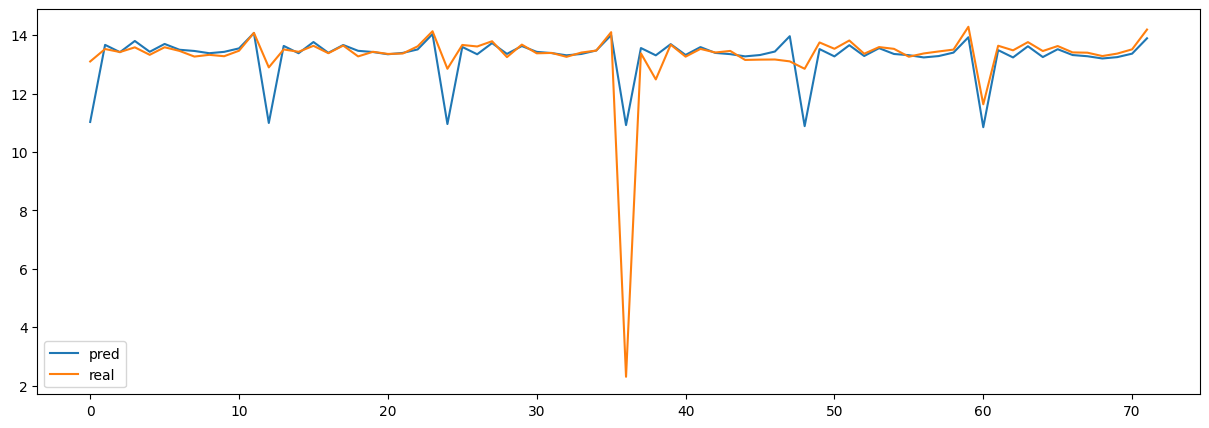

In [20]:
df_train = pd.DataFrame({
    'pred': lr.predict(x_train),
    'real': y_train
    })
df_train.plot(figsize= (15, 5));

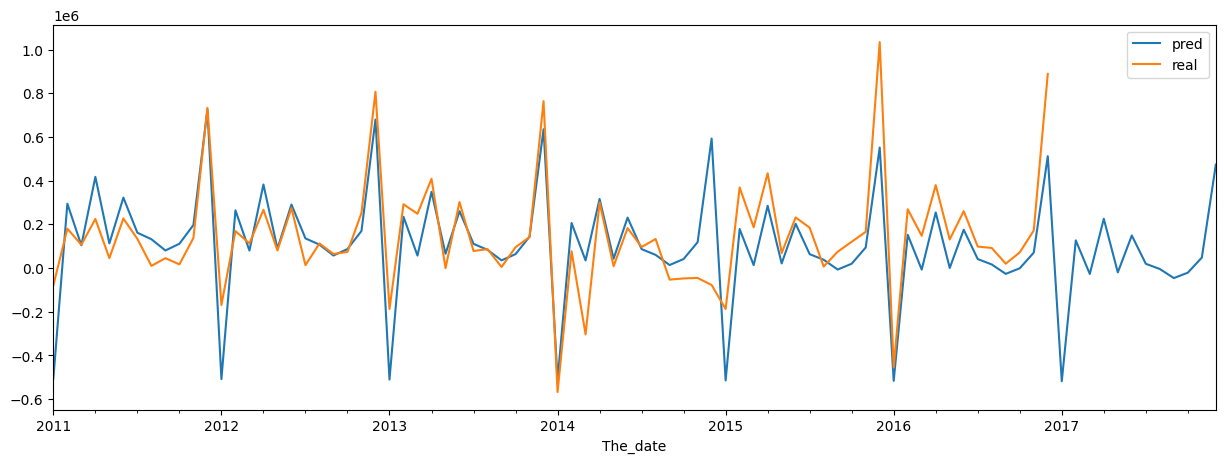

In [21]:
df_pred = pd.DataFrame({
    'pred': np.exp(lr.predict(x_full)) + (df['Growth_of_deposits_of_individuals'].min() - 10),
    'real': np.exp(y_full) + (df['Growth_of_deposits_of_individuals'].min() - 10)
    })

df_pred.index = df_with_index['The_date']

df_pred.plot(figsize= (15, 5));

In [22]:
# Значение метрики RMSE для предсказания линейной регрессии
print(round(rmse((np.exp(df_train['pred']) + (df['Growth_of_deposits_of_individuals'].min() - 10)), (np.exp(y_train) + (df['Growth_of_deposits_of_individuals'].min() - 10))), 2))

165709.11


1) Ниже использую модель Random forest для предсказния таргета;
2) Расширяю признаковую область, добавив имеющиеся переменные;

In [23]:
x_full_data = df_with_index.drop(['The_date'], axis = 1)
y_train = df['Growth_of_deposits_of_individuals'].iloc[:72]

In [24]:
x_train, x_valid, y_train_with_new_feature, y_valid_with_new_feature = train_test_split(x_full_data.iloc[:, :9], x_full_data['Nominal_average_salary_rub'], random_state= 42, test_size= 0.5)

In [25]:
# gbr = RandomForestRegressor(n_estimators= 2000, criterion= 'poisson', max_depth= 7, random_state=42)
gbr = GradientBoostingRegressor(loss= 'squared_error', learning_rate= 0.02, n_estimators= 500, subsample= 0.5, criterion= 'friedman_mse', min_samples_split = 4, min_samples_leaf = 2, min_weight_fraction_leaf = 0.2, max_depth= 4, max_features= 'auto', random_state= 42)
gbr.fit(x_train, y_train_with_new_feature)

/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: F

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, max_features='auto',
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.2, n_estimators=500,
                          random_state=42, subsample=0.5)

In [26]:
print('Train score:', rmse(gbr.predict(x_train), y_train_with_new_feature))
print('Valid score:', rmse(gbr.predict(x_valid), y_valid_with_new_feature))

Train score: 1125.9508185385882
Valid score: 2840.709295750536


In [27]:
x_full_data['new_feature'] = gbr.predict(x_full_data.iloc[:, :9])

In [28]:
# формирую новый дата фрейм для предсказания
x_train_data = x_full_data.iloc[:72, :24]

In [29]:
# rfr = RandomForestRegressor(n_estimators= 200, criterion= 'poisson', max_depth= 7, random_state=42)
rfr = GradientBoostingRegressor(loss= 'huber', learning_rate= 0.1, n_estimators= 800, min_samples_leaf = 5, max_depth= 5)
rfr.fit(x_train_data, y_train)

GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=5,
                          n_estimators=800)

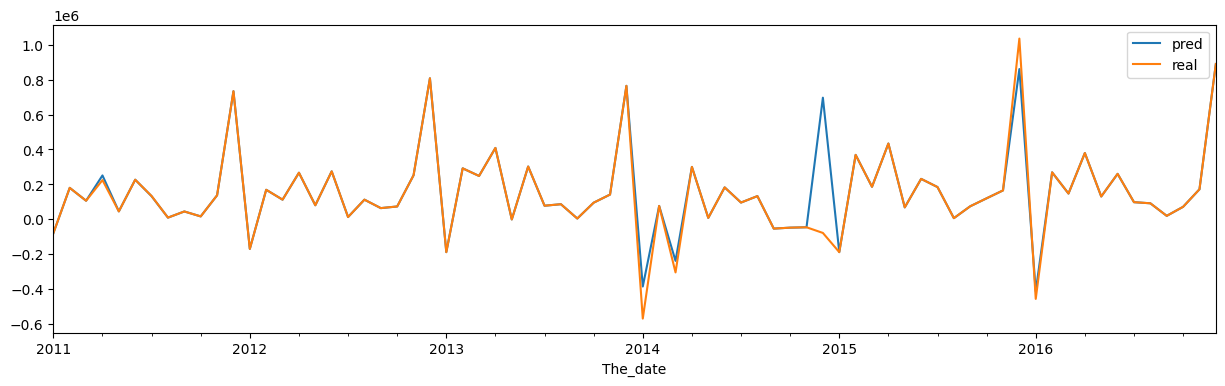

In [30]:
df_train_data = pd.DataFrame({
    'pred': rfr.predict(x_train_data),
    'real': y_train
    })
    
df_train_data.plot(figsize= (15, 4));

In [31]:
# Значение метрики RMSE для предсказания Случайного дерева
print(rmse(rfr.predict(x_train_data), y_train))

96466.37204101798


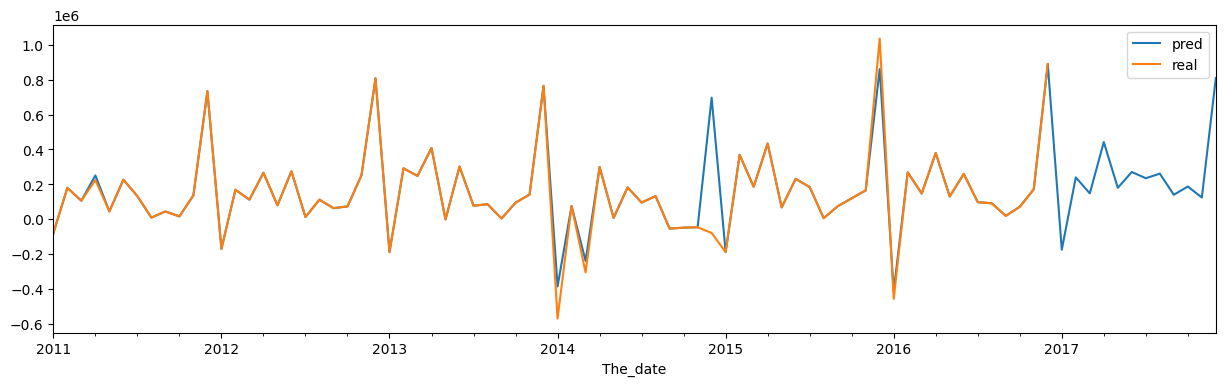

In [32]:
df_pred_data = pd.DataFrame({
    'pred': rfr.predict(x_full_data),
    'real': np.exp(y_full) + (df['Growth_of_deposits_of_individuals'].min() - 10)
    })

df_pred_data.index = df_with_index['The_date']

df_pred_data.plot(figsize= (15, 4));

## Эконометрический метод прогнозирования переменной:

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg

In [34]:
ar = AutoReg(df['Growth_of_deposits_of_individuals'][:72], lags=0, trend= 't', seasonal= True, period= 12)
ar_fitted = ar.fit()
ar_pred = ar_fitted.predict(start='2011-01-01', end='2017-12-01')

/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_

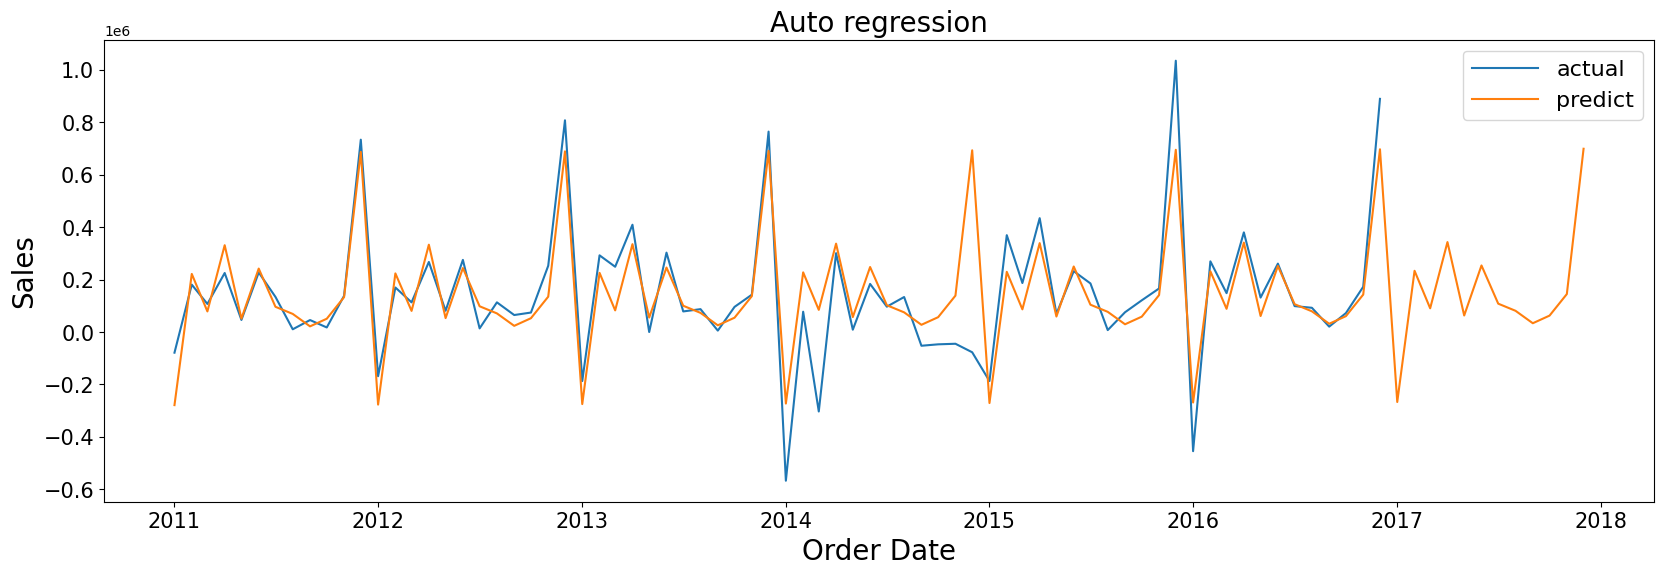

In [35]:
plt.figure(figsize=(20, 6))
plt.title('Auto regression', size = 20)

plt.plot(df['Growth_of_deposits_of_individuals'], label='actual')
plt.plot(ar_pred, label ='predict')

params = {'legend.fontsize': 16,
          'legend.handlelength': 3}

plt.rcParams.update(params)
plt.xlabel('Order Date', size = 20)
plt.ylabel('Sales', size = 20)
plt.legend()
plt.tick_params(labelsize = 15);

In [36]:
# Значение метрики RMSE для Авторегрессии 
print(round(rmse(ar_pred[12:72], df.Growth_of_deposits_of_individuals[12:72]), 1))

147165.3


In [37]:
model = ExponentialSmoothing(df['Growth_of_deposits_of_individuals'][:72], trend='add', damped_trend= True, seasonal='add', seasonal_periods= 12, initialization_method= 'estimated')
fitted_model = model.fit()
exp_pred = fitted_model.predict(start='2011-01-01', end='2017-12-01')

/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/ivanyuminov/ds_bootcamp/ds_offline/virtual_env/pytorch/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


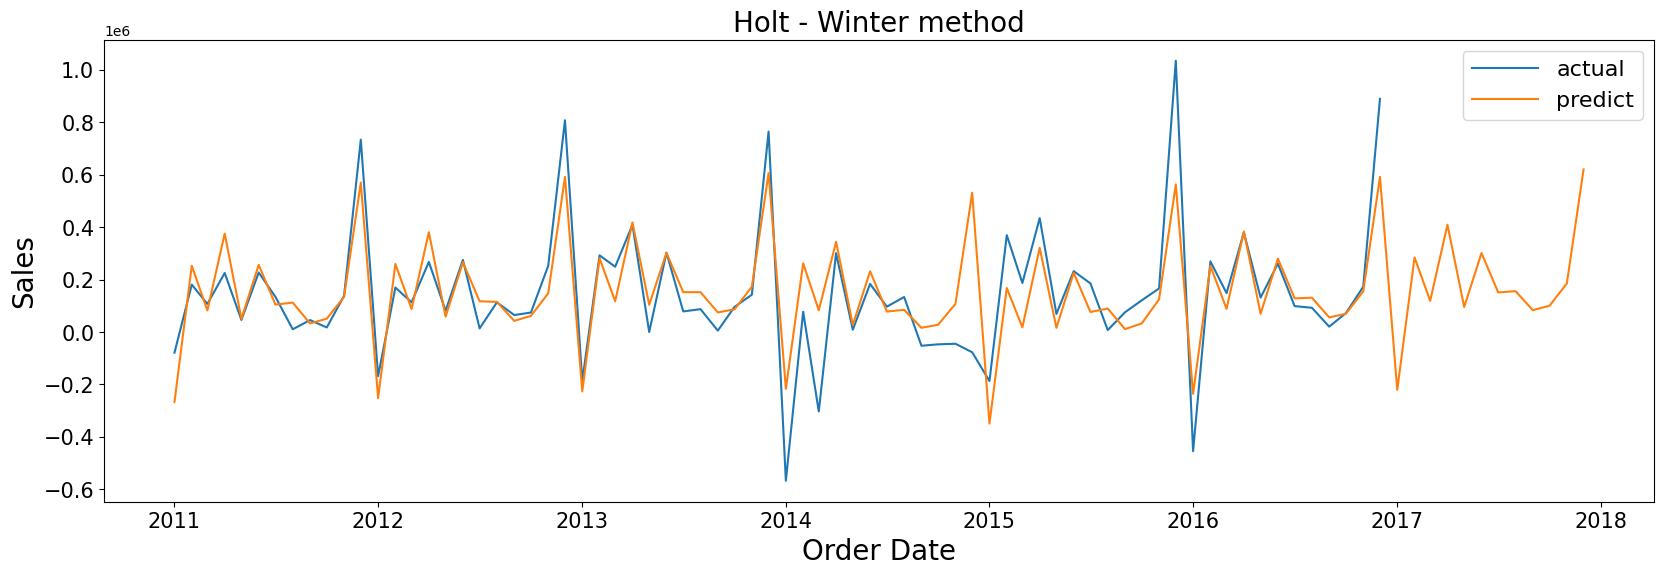

In [38]:
plt.figure(figsize=(20, 6))
plt.title('Holt - Winter method', size = 20)

plt.plot(df['Growth_of_deposits_of_individuals'][:72], label='actual')
plt.plot(exp_pred, label ='predict')

params = {'legend.fontsize': 16,
          'legend.handlelength': 3}

plt.rcParams.update(params)
plt.xlabel('Order Date', size = 20)
plt.ylabel('Sales', size = 20)
plt.legend()
plt.tick_params(labelsize = 15);

In [39]:
# Значение метрики RMSE для тройного экспоненциального сглаживания
print(round(rmse(exp_pred[12:72], df.Growth_of_deposits_of_individuals[12:72]), 1))

152746.1
